In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
Data_df=pd.read_csv('zomato.csv')
Data_df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
df=Data_df.sample(30000,random_state=1).copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 8157 to 31696
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          30000 non-null  object
 1   address                      30000 non-null  object
 2   name                         30000 non-null  object
 3   online_order                 30000 non-null  object
 4   book_table                   30000 non-null  object
 5   rate                         25391 non-null  object
 6   votes                        30000 non-null  int64 
 7   phone                        29293 non-null  object
 8   location                     29989 non-null  object
 9   rest_type                    29870 non-null  object
 10  dish_liked                   13703 non-null  object
 11  cuisines                     29978 non-null  object
 12  approx_cost(for two people)  29807 non-null  object
 13  reviews_list                

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            4609
votes                              0
phone                            707
location                          11
rest_type                        130
dish_liked                     16297
cuisines                          22
approx_cost(for two people)      193
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.shape

(30000, 17)

In [7]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [9]:
# Encoding
data = df.copy()

le = LabelEncoder()  
data.online_order = le.fit_transform(data.online_order)
data.book_table = le.fit_transform(data.book_table)
data['online_order'].unique()
data['book_table'].unique()
data.online_order.astype(float)
data.book_table.astype(float)

32498    1.0
2445     0.0
2735     0.0
21890    0.0
21853    0.0
        ... 
20824    0.0
19819    0.0
43364    1.0
1041     1.0
44140    0.0
Name: book_table, Length: 13443, dtype: float64

In [10]:
# Cleaning 'rate' column
data = data.loc[data.rate !='NEW']

data = data.loc[data.rate !='-'].reset_index(drop=True)

data.rate= data.rate.astype(str)

data.rate=data.rate.apply(lambda x : x.replace('/5',''))
data.rate=data.rate.astype(float)
data.rate

0        3.9
1        2.9
2        3.9
3        3.8
4        4.5
        ... 
13350    3.8
13351    3.9
13352    3.7
13353    3.9
13354    2.9
Name: rate, Length: 13355, dtype: float64

In [11]:
# cleaning 'cost' column
data.cost = data.cost.astype(str)
data.cost = data.cost.apply(lambda x : x.replace(',',''))
data.cost = data.cost.astype(float)
data.cost

0         900.0
1         300.0
2         150.0
3         600.0
4         400.0
          ...  
13350     750.0
13351     350.0
13352    3000.0
13353     700.0
13354     650.0
Name: cost, Length: 13355, dtype: float64

In [12]:
data.votes.astype(float)

0         74.0
1        126.0
2         61.0
3        474.0
4        556.0
         ...  
13350     59.0
13351    135.0
13352     57.0
13353    486.0
13354    140.0
Name: votes, Length: 13355, dtype: float64

In [13]:
# Dropping duplicates
data.drop_duplicates(keep='first',inplace = True)
data.shape

(13355, 17)

In [14]:
# Removing unwanted columns
data=data.drop(['url','name','address','phone','location','city','menu_item'],axis=1)

In [15]:
# Encoding
def Encode(X):
    for column in X.columns[~X.columns.isin(['rate', 'cost', 'votes'])]:
        X[column] = pd.factorize(X[column])[0]
    return X

encoded_data = Encode(data.copy())
encoded_data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,type
0,0,0,3.9,74,0,0,0,900.0,0,0
1,0,1,2.9,126,1,1,1,300.0,1,1
2,0,1,3.9,61,2,2,2,150.0,2,0
3,0,1,3.8,474,1,3,3,600.0,3,0
4,0,1,4.5,556,3,4,4,400.0,4,0


In [16]:
# Standardizing data
scaler = StandardScaler()
final_data=pd.DataFrame(scaler.fit_transform(encoded_data),columns=encoded_data.columns)
final_data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,type
0,-0.648648,-1.661918,-0.020031,-0.488678,-0.631754,-1.404984,-1.028682,0.270642,-1.482676,-0.696200
1,-0.648648,0.601714,-2.381198,-0.440734,-0.550696,-1.404154,-1.026213,-0.872223,-1.482305,-0.096809
2,-0.648648,0.601714,-0.020031,-0.500664,-0.469638,-1.403324,-1.023745,-1.157940,-1.481935,-0.696200
3,-0.648648,0.601714,-0.256148,-0.119879,-0.550696,-1.402495,-1.021277,-0.300791,-1.481564,-0.696200
4,-0.648648,0.601714,1.396669,-0.044275,-0.388580,-1.401665,-1.018808,-0.681746,-1.481193,-0.696200


In [17]:
# Splitting data
X=final_data.drop(['rate'],axis=1)
y=final_data['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [18]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)

X_train shape (9348, 9)
X_test shape (4007, 9)


In [19]:
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

y_train shape (9348,)
y_test shape (4007,)


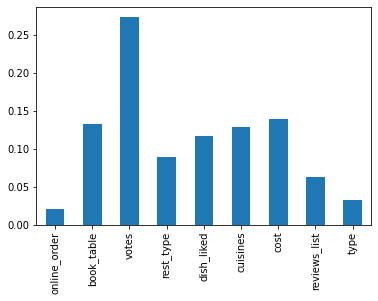

In [20]:
# dependency between ouput and other features
ETR=ExtraTreesRegressor().fit(X,y)

important_features=pd.Series(ETR.feature_importances_,index=X.columns)
important_features.plot(kind='bar')
plt.show()

In [21]:
# Linear regression
linear_regressor=LinearRegression().fit(X_train,y_train)
linear_predict=linear_regressor.predict(X_test)
print('Accuracy is : {}'.format(r2_score(y_test,linear_predict)))

Accuracy is : 0.2202431458915718


<AxesSubplot:xlabel='rate', ylabel='Density'>

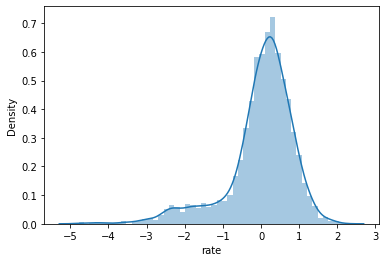

In [22]:
sns.distplot(y_test-linear_predict)

In [23]:
# Decision tree
DTree_model=DecisionTreeRegressor().fit(X_train,y_train)
DT_predict=DTree_model.predict(X_test)
print('Accuracy is : {}'.format(r2_score(y_test,DT_predict)))

Accuracy is : 0.5757882833650869


<AxesSubplot:xlabel='rate', ylabel='Density'>

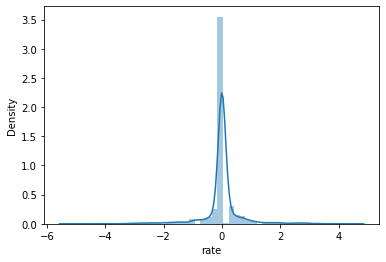

In [24]:
sns.distplot(y_test-DT_predict)

In [25]:
# Random forest
RandomForest_model=RandomForestRegressor(n_estimators=500,random_state=430,min_samples_leaf=.0001).fit(X_train,y_train)
RF_predict=RandomForest_model.predict(X_test)
print('Accuracy is : {}'.format(r2_score(y_test,RF_predict)))

Accuracy is : 0.7360678298408145


<AxesSubplot:xlabel='rate', ylabel='Density'>

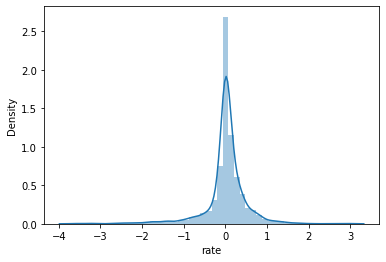

In [26]:
sns.distplot(y_test-RF_predict)

In [27]:
# XGBoost
XGB_reg=XGBRegressor().fit(X_train,y_train)
XGB_predict=XGB_reg.predict(X_test)
print('Accuracy is {}'.format(r2_score(y_test,XGB_predict)))

Accuracy is 0.6613529851089104


<AxesSubplot:xlabel='rate', ylabel='Density'>

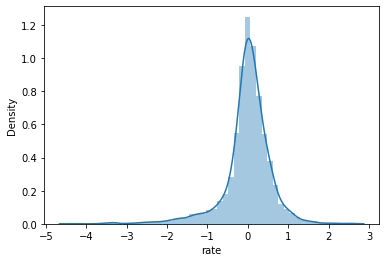

In [28]:
sns.distplot(y_test-XGB_predict)

### Results:
- Accuracy of Linear Regresssion is approximately 22
- Accuracy of Decision Tree Regresssor is approximately 80
- Accuracy of Random Forest Regresssor is approximately 87
- Accuracy of XGBoost Regresssor is approximately 77
#### Based on accuracy,Random forest regressor will be considered for the further process.

In [29]:
import pickle

In [30]:
file=open('RF.pkl','wb')
pickle.dump(RandomForest_model,file)